# Do I have a heart disease?

## - The prediction of having heart disease

Information about the notebook

## Imports

In [ ]:
pip install xgboost tensorflow

     |████████████████████████████████| 173.6 MB 16 kB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Packages/Libraries
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as mtp
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt

#Models & Model tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Dropout
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.losses import BinaryCrossentropy
from IPython.display import SVG
from keras import callbacks
from keras import models
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


#Metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Exploratory analysis &amp; Data Cleaning

### Data Cleaning

In [ ]:
#import pandas (pd)
import pandas as pd
df_hd = pd.read_csv('/work/heart_2020_cleaned.csv')

#transforming categorical variables into numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

df_hd = pd.read_csv('/work/heart_2020_cleaned.csv')

df_hd.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df_hd['HeartDisease'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['Smoking'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['AlcoholDrinking'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['Stroke'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['DiffWalking'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['Sex'].replace(['Male', 'Female'],[0, 1], inplace=True)
df_hd['PhysicalActivity'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['Asthma'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['KidneyDisease'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['SkinCancer'].replace(['No', 'Yes'],[0, 1], inplace=True)
df_hd['Diabetic'].replace(['No','No, borderline diabetes', 'Yes (during pregnancy)', 'Yes'],[0, 0, 1, 1], inplace=True)
df_hd['Race'].replace(['White', 'Black', 'Asian', 'Hispanic', 'American Indian/Alaskan Native', 'Other'],[0, 1, 2, 3, 4, 5], inplace=True)
df_hd['GenHealth'].replace(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],[0, 1, 2, 3, 4], inplace=True)
df_hd['AgeCategory'].replace(['18-24', '25-29', '30-34', '35-39','40-44' ,'45-49','50-54','55-59' , '60-64', '65-69', '70-74','75-79', '80 or older'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
df_hd.head()

### Data Analysis

In [ ]:
#descriptive statistics
df_hd.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.615585,0.135590,0.775362,2.595028,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.296412,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [ ]:
#Return unique Age categories
df_hd.head()
print(df_hd['AgeCategory'].unique())

[ 7 12  9 11  4 10  8  6  5  0  3  2  1]


<AxesSubplot:>

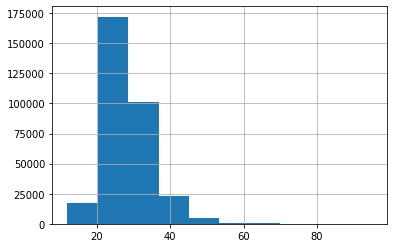

In [ ]:
#Histogram of BMI
df_hd['BMI'].hist()

#number of people with heart disease (1) and without (0) across different BMIssns.countplot(x=df_hd['BMI'],hue='HeartDisease', data=df_hd)

In [ ]:
#percentage of people with heart disease (1) and without (0) for different age categories
pd.crosstab(df_hd.AgeCategory,df_hd.HeartDisease, normalize='index').round(4)

HeartDisease,0,1
AgeCategory,,
0,0.9938,0.0062
1,0.9922,0.0078
2,0.9879,0.0121
3,0.9856,0.0144
4,0.9769,0.0231
5,0.9659,0.0341
6,0.9455,0.0545
7,0.9260,0.0740
8,0.9012,0.0988


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

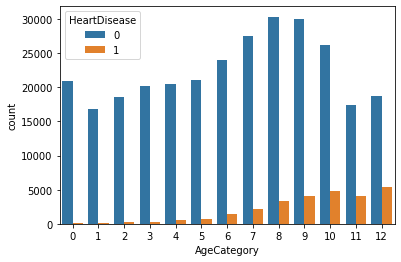

In [ ]:
#Number of people with heart disease (1) and without (0) per age category
sns.countplot(x=df_hd['AgeCategory'],hue='HeartDisease', data=df_hd) # Women after 50?

facet=sns.FacetGrid(df_hd,col='Sex')facet.map(sns.histplot,'AgeCategory',hue='HeartDisease' ) 

<AxesSubplot:xlabel='Race', ylabel='count'>

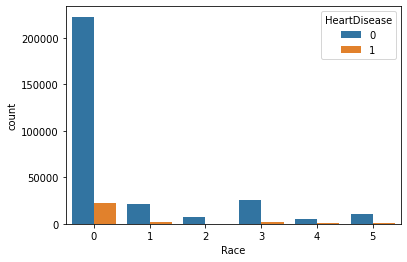

In [ ]:
#Number of people with (1) and without (0) heart disease across different race categories
sns.countplot(x=df_hd['Race'],hue='HeartDisease',data=df_hd)
#White people seem to be overrepesented in the dataset -> not representative of population

In [ ]:
#Correlation Table
correlation = df_hd.corr()
correlation

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,-0.070040,0.233432,-0.031576,0.174782,-0.100030,-0.243182,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,-0.026940,-0.004744,0.031492,0.200443,-0.150616,-0.230720,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,-0.085052,0.128331,-0.040274,0.055544,-0.097174,-0.174717,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,-0.004200,-0.059528,-0.018476,-0.057786,0.017487,0.029780,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,0.003091,0.137822,-0.006056,0.104467,-0.079455,-0.168090,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,0.040904,0.110763,0.010371,0.153975,-0.232283,-0.482697,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,0.100058,-0.155506,0.032995,0.029709,-0.095808,-0.241625,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,0.068860,0.243263,0.008948,0.209255,-0.278524,-0.413797,-0.022216,0.103222,0.153064,0.064840
Sex,-0.070040,-0.026940,-0.085052,-0.004200,0.003091,0.040904,0.100058,0.068860,1.000000,0.067478,0.001641,0.002054,-0.048247,-0.025947,0.015704,0.069191,0.009084,-0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,0.067478,1.000000,-0.185222,0.196929,-0.121687,-0.188381,0.104953,-0.058108,0.123190,0.263537


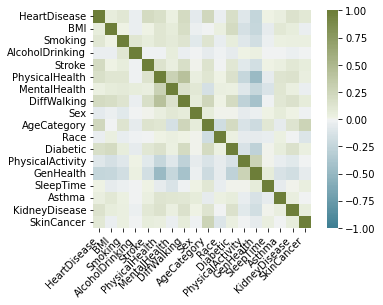

In [ ]:
#Visualizing the correlation findings
corr = df_hd.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 100, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
); #Heart disease is correlated wit physical activity

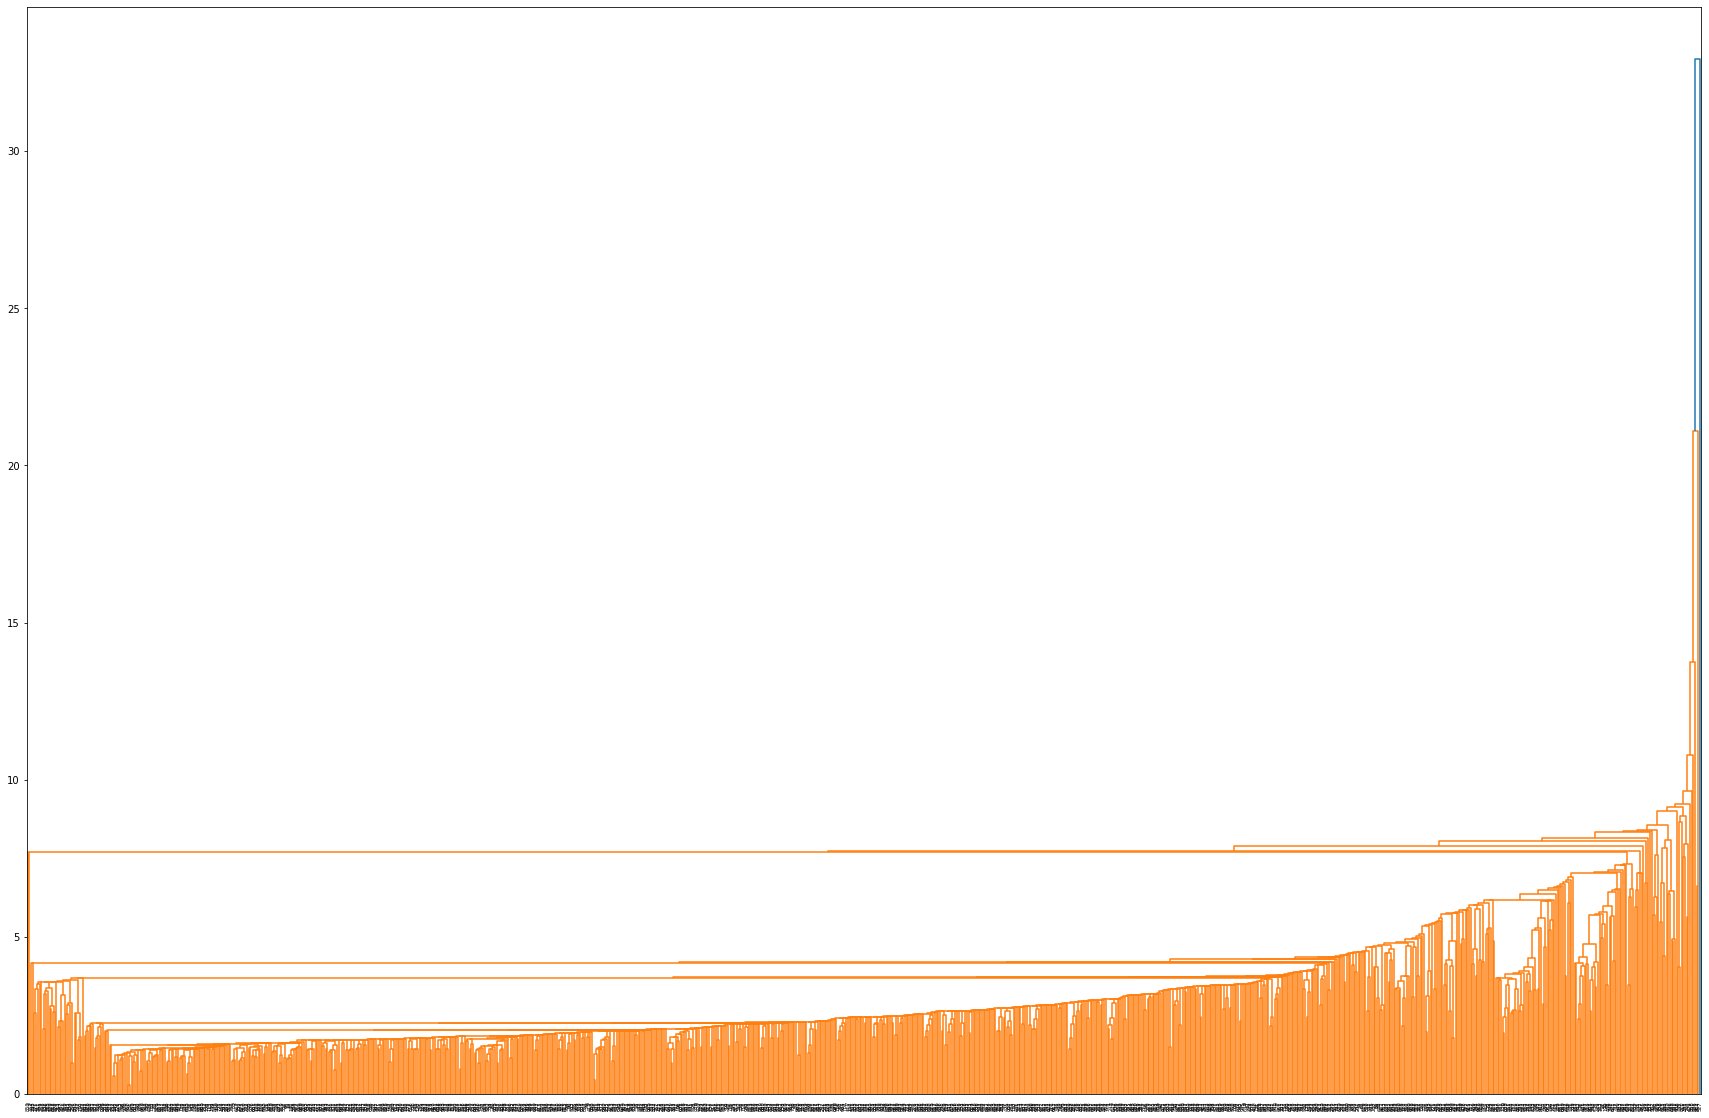

In [ ]:
#Dendrogram
df_random = df_hd.sample(n=1000)

linked = linkage(df_random, 'single')

#labelList = range(1, len(df_random.columns) )

plt.figure(figsize=(30, 20))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Clustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_random)

df_random['Cluster'] = cluster.fit_predict(df_random)

df_random.groupby('Cluster').mean()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
Cluster,,,,,,,,,,,,,,,,,,
0,0.035971,28.729065,0.388489,0.093525,0.028777,4.345324,18.647482,0.136691,0.661871,4.366906,0.798561,0.079137,0.762590,2.496403,6.892086,0.215827,0.021583,0.050360
1,0.065657,35.908838,0.439394,0.045455,0.010101,0.813131,1.252525,0.131313,0.494949,5.444444,0.777778,0.181818,0.686869,2.449495,7.020202,0.126263,0.015152,0.025253
2,0.223404,28.045319,0.521277,0.053191,0.095745,23.031915,3.744681,0.521277,0.489362,7.904255,0.457447,0.202128,0.595745,1.414894,7.148936,0.276596,0.117021,0.127660
3,0.066784,25.142724,0.398946,0.056239,0.028120,0.527241,0.557118,0.070299,0.492091,7.242531,0.471002,0.100176,0.857645,2.884007,7.195079,0.079086,0.022847,0.107206


In [ ]:
#prepare dataframe for clustering 
#draw random sample of n = 1000 to decrease runtime for the clustering algorithm 
df_hd_sample = df_hd.sample(1000)
df_hd_sample.shape

(1000, 18)

In [ ]:
#exclude 'HeartDisease' as the column we are trying to predict 
categoricals = ['Race', 'AgeCategory', 'GenHealth']
x = df_hd_sample.loc[:, df_hd_sample.columns!='HeartDisease']
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
250047,28.76,0,0,0,0.0,2.0,0,0,8,0,1,1,2,7.0,0,0,0
264724,22.14,1,0,0,0.0,0.0,0,1,9,0,0,1,4,8.0,1,0,0
7537,31.74,0,0,0,1.0,30.0,1,1,10,3,0,1,1,9.0,0,0,0
115014,29.29,0,0,0,0.0,0.0,0,0,10,0,0,1,4,7.0,0,0,0
211236,47.20,1,0,0,20.0,30.0,0,1,7,0,1,1,1,4.0,1,0,0


In [ ]:
y = df_hd_sample['HeartDisease']
y.head()

250047    0
264724    0
7537      0
115014    0
211236    0
Name: HeartDisease, dtype: int64

In [ ]:
# Hierarchical Clustering - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

clustering = AgglomerativeClustering().fit(x)

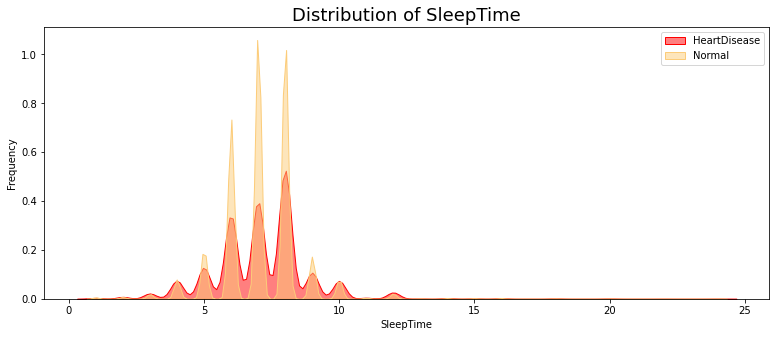

In [ ]:
#subplots: Heart disease and sleep time
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df_hd[df_hd["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df_hd[df_hd["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()


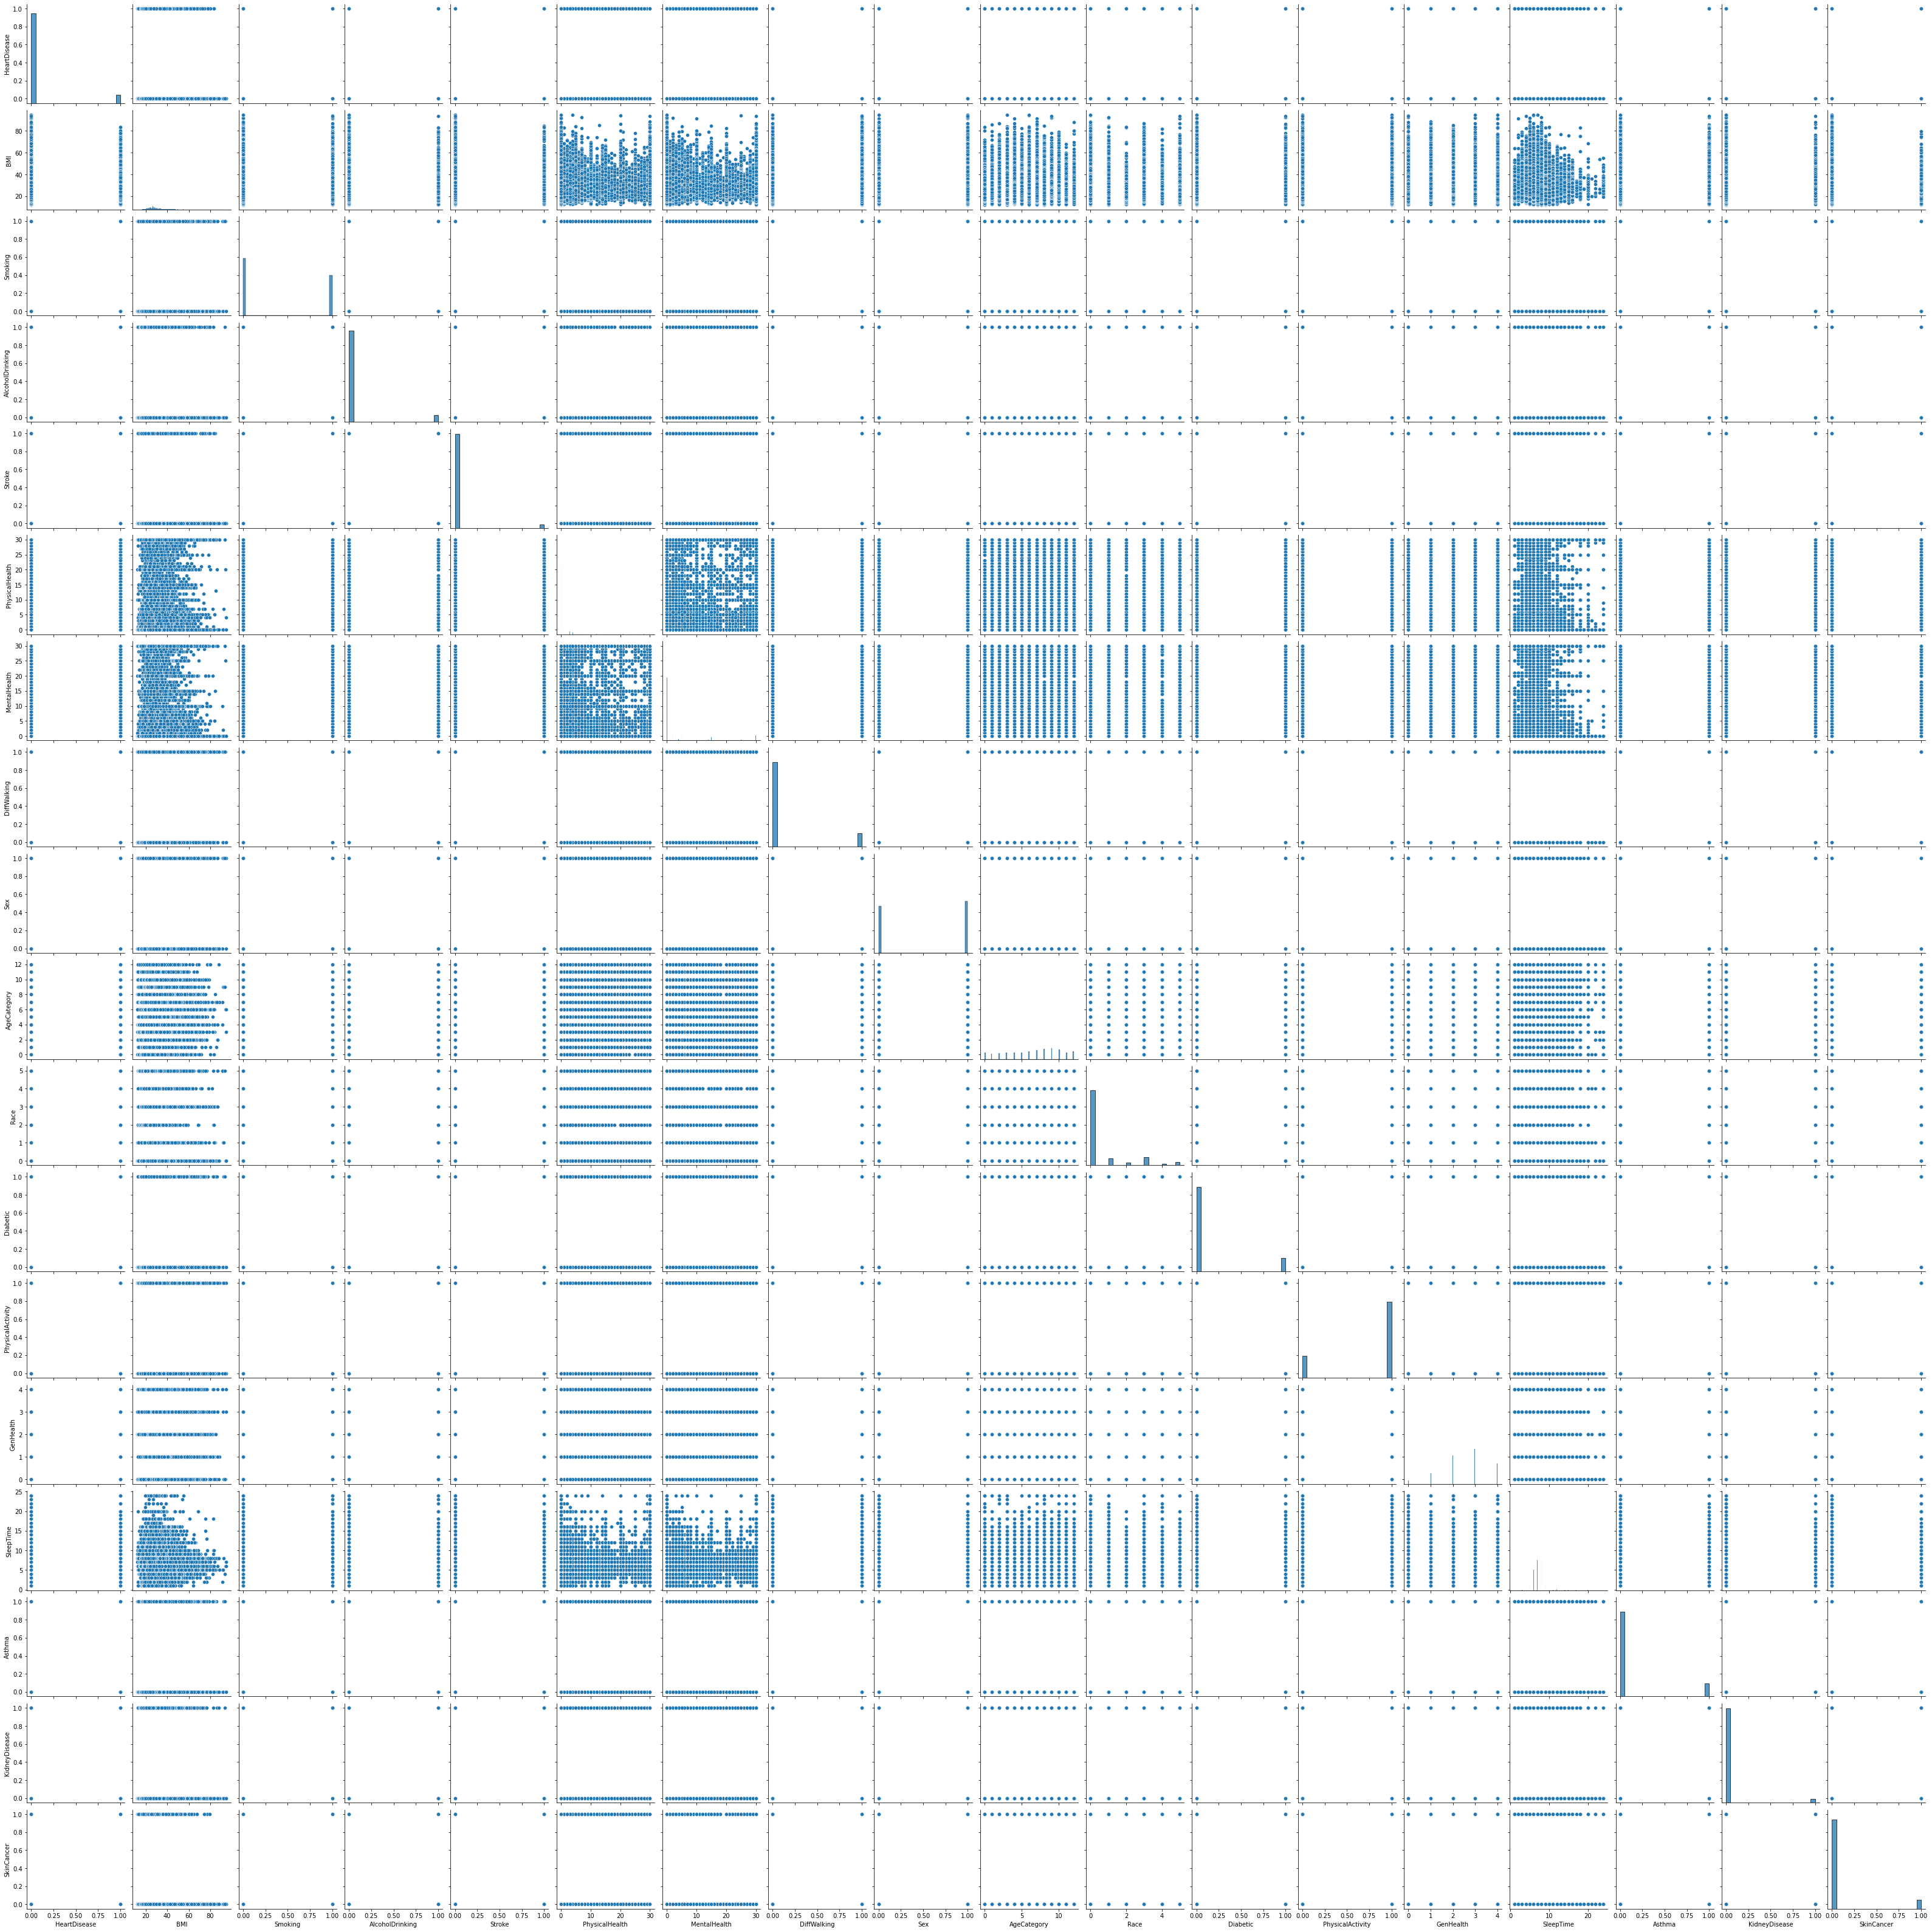

In [ ]:
#Pairplots
sns.pairplot(df_hd)

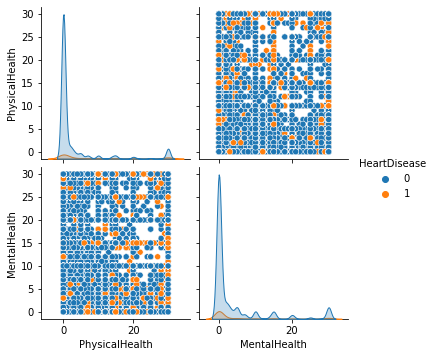

In [ ]:
#Pairplot: relationship between mental health, physical health and heart disease
sns.pairplot(df_hd,vars=["PhysicalHealth", "MentalHealth"], hue="HeartDisease")

In [ ]:
df_hd.to_csv('df_explored.csv', index = False)

## Creating a Resampled Dataset

To fix the problem regarding the bias towards individuals with no heart disease, we created a smaller dataset that includes an equal amount of individuals with and without heart disease.

In [ ]:
df_diseaseonly=df_hd.loc[df_hd.HeartDisease==1]
df_diseasenone=df_hd.loc[df_hd.HeartDisease==0]
df_diseaseonly.reset_index()
df_diseasenone.reset_index()

df_diseaseonly_sample=df_diseaseonly.sample(n=13500, random_state=3)
df_diseasenone_sample=df_diseasenone.sample(n=13500, random_state=3)

mergeddf = pd.concat([df_diseaseonly_sample, df_diseasenone_sample])

x = mergeddf.iloc[:,1:]
y = mergeddf.iloc[:,0]

sc = StandardScaler() 
x = sc.fit_transform(x)  


compression_opts = dict(method='zip',
                        archive_name='df_resampled.csv')  
mergeddf.to_csv('df_resampled.csv', index=False
         )

In [ ]:
df_resampled = pd.read_csv('df_resampled.csv')

df_resampled.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,25.24,1,0,0,30.0,0.0,1,1,9,1,0,1,0,6.0,0,1,0
1,1,26.73,1,1,0,20.0,2.0,1,0,9,0,0,0,1,7.0,0,0,1
2,1,33.23,1,0,0,0.0,0.0,0,0,10,0,1,0,3,6.0,0,0,0
3,1,29.14,1,0,0,0.0,0.0,0,0,7,0,0,1,2,8.0,0,0,0
4,1,29.26,1,0,0,30.0,30.0,0,1,8,5,0,0,0,6.0,1,0,0


<AxesSubplot:>

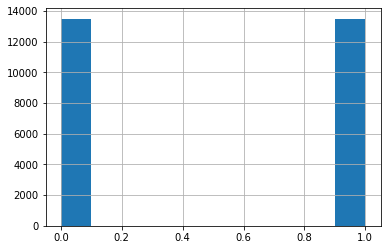

In [ ]:
df_resampled['HeartDisease'].hist()

## Baseline Models

Our selection of baseline models includes:  Logistic Regression, and a Categorical Naïves Bayes Model 

### Logistic Regression - Merged Dataset

In [ ]:
#Defining x and y variables

x = mergeddf.iloc[:, 1:].values
y = mergeddf.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, stratify=y, random_state=3)

In [ ]:
# checking whether train and test data have same distribution of diseased and non-diseased persons 
print("y_train", y_train.shape, 
      "Num 0: ", sum(y_train == 0), "(", round(100*sum(y_train==0)/y_train.shape[0],2), "%)",
      "Num 1:", sum(y_train==1), "(", round(100*sum(y_train==1)/y_train.shape[0],2), "%)" )
print("y_test", y_test.shape,
      " Num 0: ", sum(y_test == 0), "(", round(100*sum(y_test==0)/y_test.shape[0],2), "%)",
      " Num 1:", sum(y_test==1), "(", round(100*sum(y_test==1)/y_test.shape[0],2), "%)" )

y_train (13500,) Num 0:  6750 ( 50.0 %) Num 1: 6750 ( 50.0 %)
y_test (13500,)  Num 0:  6750 ( 50.0 %)  Num 1: 6750 ( 50.0 %)


In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(max_iter= 1000, multi_class= 'multinomial')  # create the logistic regression object
modelLR = modelLR.fit(x_train, y_train)  # fit on trainings data
modelLR.intercept_, modelLR.coef_ 

(array([-0.87505937]),
 array([[ 0.00564016,  0.20274215, -0.13968344,  0.66351243,  0.00511631,
          0.0029324 ,  0.19745088, -0.3578872 ,  0.14524683, -0.00187845,
          0.25379843,  0.00815208, -0.23897928, -0.00948639,  0.14513517,
          0.2554697 ,  0.11649704]]))

##### Two predictios based on test data
1. Probability 
2. Binary (categorisation)

In [ ]:
# prediction of probabilities 
y_pred1 = modelLR.predict_proba(x_test)  # make predictions using test data
y_pred1 = y_pred1[0:10]
y_pred1_arr = [round(item[1],2) for item in y_pred1]
y_pred1_arr

[0.17, 0.54, 0.36, 0.64, 0.18, 0.65, 0.98, 0.05, 0.57, 0.37]

In [ ]:
# categorisation: binary prediction 
y_pred1 = modelLR.predict(x_test)  # make predictions using test data
y_pred1[:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
nrCorrectSpecified = 0
for i in range(len(y_test)):
  if (y_test[i] == y_pred1[i]):
    nrCorrectSpecified = nrCorrectSpecified + 1

print("Baseline accuracy: ", nrCorrectSpecified/len(y_test)) 

Baseline accuracy:  0.762


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


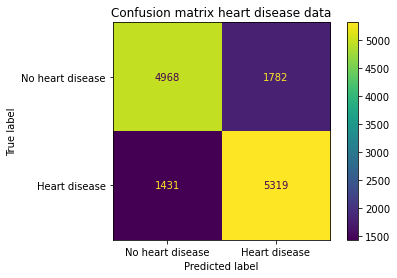

In [ ]:
from sklearn.metrics import plot_confusion_matrix

## Plot confusion matrix
conf_matrix = plot_confusion_matrix(modelLR, x_test, y_test, 
                                  display_labels=["No heart disease", "Heart disease"])
conf_matrix.ax_.set_title("Confusion matrix heart disease data")
conf_matrix

In [ ]:
print("precision: ", 5318/(5318+1782))
print("recall: ", 5318/(5318+1432))

false_positive = round((1782/(5318+1782))*100, 2)
false_negative = round((1432/(5318+1432))*100,2)

print("Out of people predicted as having a heart disease based on our model ,", 
        false_positive,"% actually have no heart disease (false positive)");
print("Out of people that actually have a heart disease ,", 
        false_negative,"% are predicted to have no heart disease based on our model (false negative)");

precision:  0.7490140845070422
recall:  0.7878518518518518
Out of people predicted as having a heart disease based on our model , 25.1 % actually have no heart disease (false positive)
Out of people that actually have a heart disease , 21.21 % are predicted to have no heart disease based on our model (false negative)


##### Logistic regression with biased sample (10% heart disease):

accuracy: 0.9155722326454033

precision: 0.533203125

recall: 0.11079545454545454

##### Logistic regression with balanced sample (50% heart disease):

accuracy: 0.7619259259259259

precision: 0.741608118657299

recall: 0.7818930041152263


#### Interpretation: 
Accuracy lower with resampled dataset but higher precision and recall score which is more important

### Categorical Naïve Bayes Model

In [ ]:
list_xx= ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer','PhysicalHealth','MentalHealth','AgeCategory','Race','GenHealth','SleepTime']
x_categorical=mergeddf[list_xx]
y = mergeddf.iloc[:, 0].values

from sklearn.naive_bayes import CategoricalNB
model_categoricalNB =CategoricalNB()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_categorical, y, train_size=0.91, stratify=y, random_state=3)
model_categoricalNB.fit(x_train,y_train)

CategoricalNB()

In [ ]:
y_predcategoricalNB=model_categoricalNB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_predcategoricalNB), 2), ": is the accuracy score")

from sklearn.metrics import precision_score
print(round(precision_score(y_test, y_predcategoricalNB), 2), ": is the precision score")

from sklearn.metrics import recall_score
print(round(recall_score(y_test, y_predcategoricalNB), 2), ": is the recall score")

from sklearn.metrics import f1_score
print(round(f1_score(y_test, y_predcategoricalNB), 2), ": is the f1 score")

0.74 : is the accuracy score
0.75 : is the precision score
0.72 : is the recall score
0.73 : is the f1 score


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


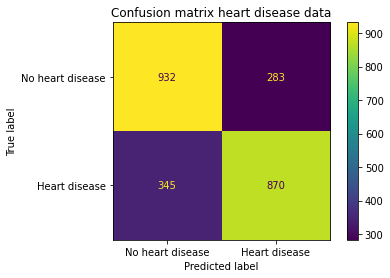

In [ ]:
from sklearn.metrics import plot_confusion_matrix

## Plot confusion matrix
conf_matrix = plot_confusion_matrix(model_categoricalNB, x_test, y_test, 
                                  display_labels=["No heart disease", "Heart disease"])
conf_matrix.ax_.set_title("Confusion matrix heart disease data")
conf_matrix

### Decision Tree 

In [ ]:
import pandas as pd
df = pd.read_csv("resampled_heartdisease.csv")


In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=3)

In [ ]:
y_train.shape[0] / y.shape[0]

0.8

In [ ]:
param_grid_dt = [
    {'max_depth': [3,4,5,6,7,8,9,10]}
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# create the cross-validation object
optimal_params_dt = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(random_state=1),  # DT instance
    param_grid = param_grid_dt,                               # grid search
    cv = 5,                                                   # k=5 CV
    scoring='accuracy'                                        # use accuracy measure
)

In [ ]:
# perfrom the grid search on the trainings data
optimal_params_dt.fit(X_train, y_train)

# what is the best hyper parameter?
optimal_params_dt.best_params_

{'max_depth': 6}

In [ ]:
# Create DT with best hyperparameter
modelDT = tree.DecisionTreeClassifier(
    max_depth = 6,
    random_state = 1
    )

# Train on trainings data
modelDT = modelDT.fit(X_train, y_train)

In [ ]:
prediction = modelDT.predict(X_test)
probs = modelDT.predict_proba(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred2 = modelDT.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("DT accuracy: ", accuracy2)

DT accuracy:  0.7429629629629629


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


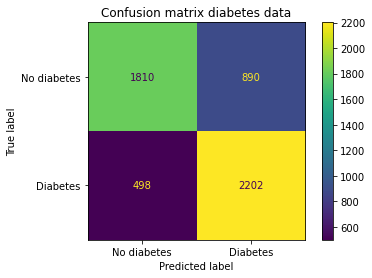

In [ ]:
from sklearn.metrics import plot_confusion_matrix

## Plot confusion matrix
conf_matrix = plot_confusion_matrix(modelDT, X_test, y_test, 
                                  display_labels=["No diabetes", "Diabetes"])
conf_matrix.ax_.set_title("Confusion matrix diabetes data")
conf_matrix

In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_pred2), 2), ": is the accuracy score")

from sklearn.metrics import precision_score
print(round(precision_score(y_test, y_pred2), 2), ": is the precision score")

from sklearn.metrics import recall_score
print(round(recall_score(y_test, y_pred2), 2), ": is the recall score")

from sklearn.metrics import f1_score
print(round(f1_score(y_test, y_pred2), 2), ": is the f1 score")

0.74 : is the accuracy score
0.71 : is the precision score
0.82 : is the recall score
0.76 : is the f1 score


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

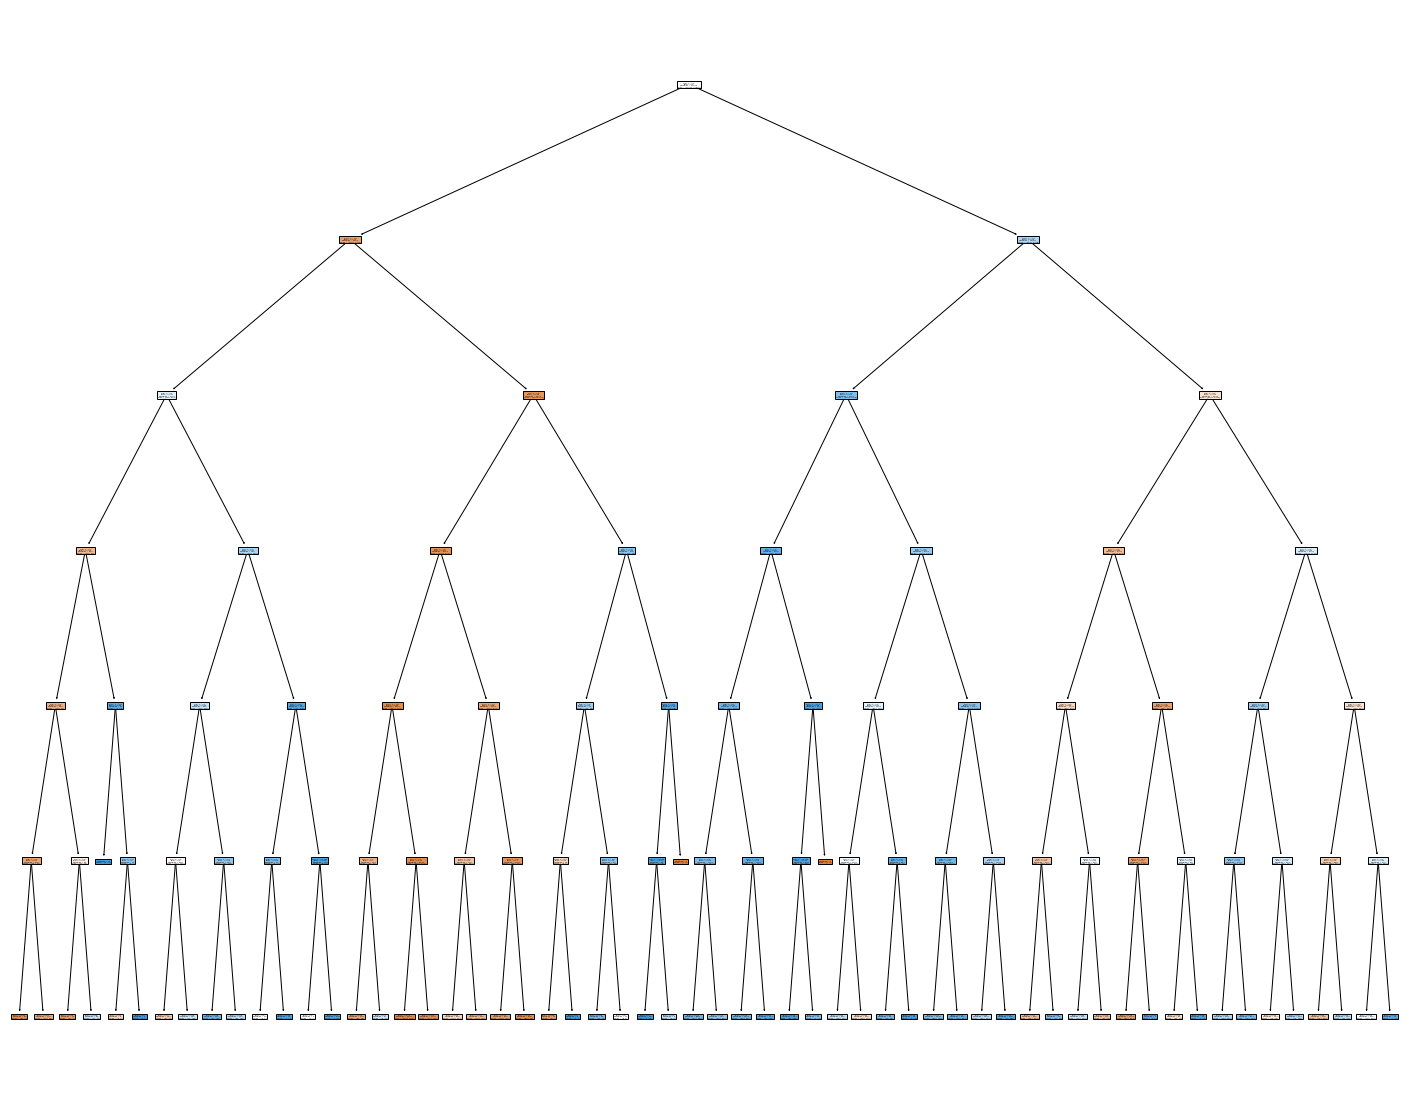

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(modelDT,
                   filled=True)

### Support Vector Machine

In [ ]:
#Load data
heart_disease_svm1 = pd.read_csv('df_resampled.csv')
#used for grid search parameters only
#heart_disease_svm1 = heart_disease_svm1.sample(n=2500)


#check if everything is ok
heart_disease_svm1.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,0.500000,28.820601,0.490926,0.055889,0.092407,5.337630,4.279259,0.240370,0.475667,7.734630,0.548630,0.221481,0.715037,2.219148,7.120704,0.157407,0.078630,0.132667
std,0.500009,6.411367,0.499927,0.229711,0.289606,9.899465,8.573391,0.427316,0.499417,3.390199,1.249025,0.415252,0.451405,1.135057,1.596735,0.364191,0.269165,0.339220
min,0.000000,12.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.500000,27.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,32.080000,1.000000,0.000000,0.000000,5.000000,4.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,83.330000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Distribution outcome variable'}, ylabel='Frequency'>

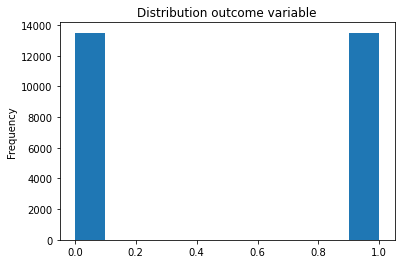

In [ ]:
#see distribution
heart_disease_svm1['HeartDisease'].plot(kind='hist', title = "Distribution outcome variable")

In [ ]:
#print number of diseased/healthy
print("Number of 0 values:", sum(heart_disease_svm1['HeartDisease']==0),
      "(",round(100*sum(heart_disease_svm1['HeartDisease']==0)/heart_disease_svm1.shape[0],2),"% )")
print("Number of 1 values:", sum(heart_disease_svm1['HeartDisease']==1),
      "(",round(100*sum(heart_disease_svm1['HeartDisease']==1)/heart_disease_svm1.shape[0],2),"% )")

Number of 0 values: 13500 ( 50.0 % )
Number of 1 values: 13500 ( 50.0 % )


In [ ]:
#create train/test split
x_svm = heart_disease_svm1.iloc[:, 1:].values
y_svm = heart_disease_svm1.iloc[:, 0].values

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, train_size=0.8, stratify=y_svm, random_state=3)

#see if split was ok
(heart_disease_svm1.HeartDisease == y_svm).sum()

27000

In [ ]:
# check how the splitting is done
print("x_train_svm:", x_train_svm.shape)
print("x_test_svm:",  x_test_svm.shape)
print(y_train_svm.shape[0] / y_svm.shape[0])
print("y_train_svm", y_train_svm.shape, 
      "Num 0: ", sum(y_train_svm == 0), "(", round(100*sum(y_train_svm==0)/y_train_svm.shape[0],2), "%)",
      "Num 1:", sum(y_train_svm==1), "(", round(100*sum(y_train_svm==1)/y_train_svm.shape[0],2), "%)" )
print("y_test", y_test_svm.shape,
      " Num 0: ", sum(y_test_svm == 0), "(", round(100*sum(y_test_svm==0)/y_test_svm.shape[0],2), "%)",
      " Num 1:", sum(y_test_svm==1), "(", round(100*sum(y_test_svm==1)/y_test_svm.shape[0],2), "%)" )

x_train_svm: (21600, 17)
x_test_svm: (5400, 17)
0.8
y_train_svm (21600,) Num 0:  10800 ( 50.0 %) Num 1: 10800 ( 50.0 %)
y_test (5400,)  Num 0:  2700 ( 50.0 %)  Num 1: 2700 ( 50.0 %)


In [ ]:
# standardize data (axis=0 means over the columns)
X_train_std = (x_train_svm - x_train_svm.min(axis=0)) / (x_train_svm.max(axis=0) - x_train_svm.min(axis=0))
X_test_std = (x_test_svm - x_test_svm.min(axis=0)) / (x_test_svm.max(axis=0) - x_test_svm.min(axis=0))

# check some variables 
print(X_train_std[:,2].min(), X_train_std[:,2].max()) 
print(X_test_std[:,4].min(), X_test_std[:,4].max())
X_train_std

0.0 1.0
0.0 1.0


array([[0.25351114, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.25890197, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22641509, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14838984, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22301036, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.24528302, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# Hyperparameter tuning with gridsearch
param_grid_svm = [
    {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
     'kernel': ['linear', 'poly', 'rbf']}
]

In [ ]:
# GridSearch
optimal_params_svm = GridSearchCV(
    estimator = SVC(degree = 2),   # support vector classifier instance
    param_grid = param_grid_svm,   # grid search
    cv = 5,                        # k=5 CV
    scoring='accuracy'             
)

In [ ]:
# keep track of running time
import datetime

begin_time = datetime.datetime.now()
#grid search on the training data
optimal_params_svm.fit(X_train_std, y_train_svm)
print('Total run time single SVM: ',(datetime.datetime.now()-begin_time))

Total run time single SVM:  0:00:31.856564


In [ ]:
# the best parameters
optimal_params_svm.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [ ]:
# SVM with the best hyperparameters
modelSVC1 = SVC(kernel = optimal_params_svm.best_params_['kernel'],
               C = optimal_params_svm.best_params_['C'], 
               degree = 2
)
modelSVC1 = modelSVC1.fit(X_train_std, y_train_svm)

In [ ]:
# Accuracy on the test set
y_pred_svm = modelSVC1.predict(X_test_std)  # make predictions using test data
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
print("Accuracy SVM1: ", accuracy_svm)

Accuracy SVM1:  0.7564814814814815


In [ ]:
# Accuracy
accuracy_score_svm = accuracy_score(y_test_svm, y_pred_svm)
print(round(accuracy_score_svm, 2), ": is the accuracy score of the svm Model")

#Recall
recall_score_svm = recall_score(y_test_svm, y_pred_svm)
print(round(recall_score_svm, 2), ": is the recall score of the svm Model")

#Precision
precision_score_svm = precision_score(y_test_svm, y_pred_svm)
print(round(precision_score_svm, 2), ": is the precision score of the svm Model")

#F1 score
f1_score_svm = f1_score(y_test_svm, y_pred_svm)
print(round(f1_score_svm, 2), ": is the f1 score of the svm Model")

0.76 : is the accuracy score of the svm Model
0.78 : is the recall score of the svm Model
0.74 : is the precision score of the svm Model
0.76 : is the f1 score of the svm Model


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


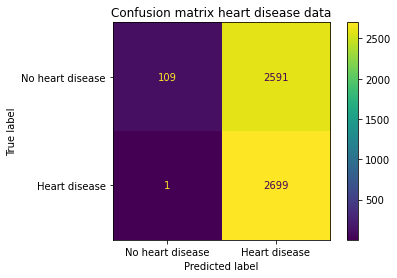

In [ ]:
## Plot confusion matrix
conf_matrix_svm = plot_confusion_matrix(modelSVC1, x_test_svm, y_test_svm, 
                                  display_labels=["No heart disease", "Heart disease"])
conf_matrix_svm.ax_.set_title("Confusion matrix heart disease data")
conf_matrix_svm

## Ensemble Methods

### XGBoost

After running the baseline models, we started with fitting more advanced models, namely with the XGBoost Classifier. This model uses gradient boosting optimisation to improve the accuracy.

In [ ]:
#install XGBoost (this must be done only in case the code is run on a virtual machine. We used Deepnote.
#if XGBoost is installed locally, there's no need to run this cell.)
!pip install xgboost==1.5.2

     |████████████████████████████████| 173.6 MB 15 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


<AxesSubplot:title={'center':'Distribution outcome variable'}, ylabel='Frequency'>

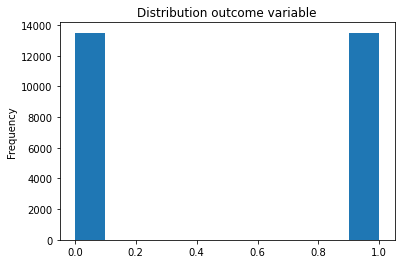

In [ ]:
#Load data
heart_disease_xgb = pd.read_csv('df_resampled.csv')

#Train test split
x_xgb = heart_disease_xgb.iloc[:, 1:].values
y_xgb = heart_disease_xgb.iloc[:, 0].values
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_xgb, y_xgb, train_size=0.8, stratify=y_xgb, random_state=3)

#Plot the distribution
heart_disease_xgb['HeartDisease'].plot(kind='hist', title = "Distribution outcome variable")

In [ ]:
# Define the model
XGBmodel = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=3)

# Fit the model
XGBmodel.fit(x_train_xgb, y_train_xgb)

# Get predictions
y_pred_xgb = XGBmodel.predict(x_test_xgb)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:11:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# Accuracy
accuracy_score_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print(round(accuracy_score_xgb, 2), ": is the accuracy score of the xgb Model")

#Recall
recall_score_xgb = recall_score(y_test_xgb, y_pred_xgb)
print(round(recall_score_xgb, 2), ": is the recall score of the xgb Model")

#Precision
precision_score_xgb = precision_score(y_test_xgb, y_pred_xgb)
print(round(precision_score_xgb, 2), ": is the precision score of the xgb Model")

#F1 score
f1_score_xgb = f1_score(y_test_xgb, y_pred_xgb)
print(round(f1_score_xgb, 2), ": is the f1 score of the xgb Model")

0.76 : is the accuracy score of the xgb Model
0.81 : is the recall score of the xgb Model
0.73 : is the precision score of the xgb Model
0.77 : is the f1 score of the xgb Model


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


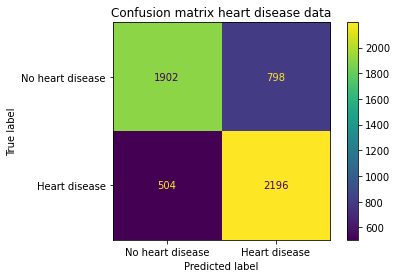

In [ ]:
# Plot confusion matrix
conf_matrix_xgb = plot_confusion_matrix(XGBmodel, x_test_xgb, y_test_xgb, 
                                  display_labels=["No heart disease", "Heart disease"])
conf_matrix_xgb.ax_.set_title("Confusion matrix heart disease data")
conf_matrix_xgb

### Neural Network

For one ensemble model, we made a sequential neural network. The model includes two hidden layers with two dropout layers. The data was then scaled standardly so as to eliminate biases from the input data.

In [ ]:
def load_data():
    dataset = pd.read_csv("df_resampled.csv")
    int_dataset = dataset.astype('int')
    x = int_dataset.iloc[:, 1:].values
    y = int_dataset.loc[:, ['HeartDisease']].values
    
    x_train_snn, x_test_snn, y_train_snn, y_test_snn = train_test_split(x, y,train_size=0.8, stratify=y, random_state=3)

    return x_train_snn, y_train_snn, x_test_snn, y_test_snn

In [ ]:
# This function contains the SNN's layers, which includes two hidden layers and a dropout layer.
# It also includes the compiler, which uses the versatile adam as an optimizer.
# Binary crossentropy loss is used since the output of the model is between 0 and 1.

def build_model():
    model = Sequential()
    model.add(Dense(48, activation='relu', input_shape=(x_train_snn.shape[1],)))
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.0006), 
                    loss=BinaryCrossentropy(), 
                    metrics=['binary_accuracy'])

    return model

In [ ]:
x_train_snn, y_train_snn, x_test_snn, y_test_snn = load_data()

# Here, StandardScaler is used on the input data to get rid of biases.

sc = StandardScaler() 
x_train_snn = sc.fit_transform(x_train_snn)  
x_test_snn = sc.fit_transform(x_test_snn)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

model = build_model()

model.fit(x_train_snn, y_train_snn, 
        validation_data=(x_test_snn, y_test_snn), 
        epochs=50,
        batch_size=64, 
        verbose=2, 
        callbacks=[early_stopping], 
        use_multiprocessing=True)

Epoch 1/50
338/338 - 1s - loss: 0.5488 - binary_accuracy: 0.7289 - val_loss: 0.5083 - val_binary_accuracy: 0.7561 - 1s/epoch - 4ms/step
Epoch 2/50
338/338 - 1s - loss: 0.5077 - binary_accuracy: 0.7615 - val_loss: 0.5044 - val_binary_accuracy: 0.7589 - 683ms/epoch - 2ms/step
Epoch 3/50
338/338 - 1s - loss: 0.5003 - binary_accuracy: 0.7634 - val_loss: 0.5044 - val_binary_accuracy: 0.7572 - 702ms/epoch - 2ms/step
Epoch 4/50
338/338 - 1s - loss: 0.4972 - binary_accuracy: 0.7676 - val_loss: 0.5031 - val_binary_accuracy: 0.7587 - 900ms/epoch - 3ms/step
Epoch 5/50
338/338 - 1s - loss: 0.4946 - binary_accuracy: 0.7692 - val_loss: 0.5027 - val_binary_accuracy: 0.7594 - 1s/epoch - 4ms/step
Epoch 6/50
338/338 - 1s - loss: 0.4915 - binary_accuracy: 0.7694 - val_loss: 0.5024 - val_binary_accuracy: 0.7583 - 936ms/epoch - 3ms/step
Epoch 7/50
338/338 - 1s - loss: 0.4923 - binary_accuracy: 0.7688 - val_loss: 0.5025 - val_binary_accuracy: 0.7548 - 920ms/epoch - 3ms/step
Epoch 8/50
338/338 - 1s - loss: 0

In [ ]:
scores_test = model.evaluate(x_test_snn, y_test_snn)
print(f'Accuracy on test data: {scores_test[1]} \n Error: {1 - scores_test[1]}')

scores_training = model.evaluate(x_train_snn, y_train_snn)
print(f'Accuracy on training data: {scores_training[1]} \n Error: {1 - scores_training[1]}')

169/169 [==============================] - 0s 1ms/step - loss: 0.5057 - binary_accuracy: 0.7604
Accuracy on test data: 0.7603703737258911 
 Error: 0.2396296262741089
675/675 [==============================] - 1s 2ms/step - loss: 0.4888 - binary_accuracy: 0.7722
Accuracy on training data: 0.7722222208976746 
 Error: 0.22777777910232544


In [ ]:
y_pred_snn = model.predict(x_test_snn)

### RFC Model

Another ensemble model used is the random forest classifier. The independent variables have been standardized by means of a standard scalar as to eliminate biases. Then the model has been optimized with a gridsearch, evaluated with performance metrics and ultimately saved

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
def load_data():
    dataset = pd.read_csv("df_resampled.csv")
    int_dataset = dataset.astype('int')
    x = int_dataset.iloc[:, 1:].values
    y = int_dataset.loc[:, ['HeartDisease']].values
    
    x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, stratify=y, random_state=3)

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_data()

sc = StandardScaler() 
x_train = sc.fit_transform(x_train)  
x_test = sc.fit_transform(x_test) #Standardizes data to remove biases

from sklearn.ensemble import RandomForestClassifier as RFC

rf_model=RFC(random_state=3)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_parameters = {'n_estimators': [50,100,200,500,750,1000], 
'max_features': [3,4,5], 'max_depth': [10,15,20,25],'min_samples_leaf': [5,10,15]}

optimal_rf = GridSearchCV(estimator=rf_model,param_grid=rf_parameters,cv=5,scoring='recall',verbose=0, n_jobs=-1 )

In [ ]:
optimal_rf.fit(x_train,y_train)
print(optimal_rf.best_params_,optimal_rf.best_score_)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 10, 'n_estimators': 100} 0.8161111111111111


In [ ]:
rf_best_model = RFC(n_estimators=optimal_rf.best_params_['n_estimators'], max_depth=optimal_rf.best_params_['max_depth'],
                    max_features=optimal_rf.best_params_['max_features'], min_samples_leaf=optimal_rf.best_params_['min_samples_leaf'], random_state=3)

rf_best_model = rf_best_model.fit(x_train,y_train)
rf_pred_best = rf_best_model.predict(x_test)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, rf_pred_best), 2), ": is the accuracy score")

from sklearn.metrics import precision_score
print(round(precision_score(y_test, rf_pred_best), 2), ": is the precision score")

from sklearn.metrics import recall_score
print(round(recall_score(y_test, rf_pred_best), 2), ": is the recall score")

from sklearn.metrics import f1_score
print(round(f1_score(y_test, rf_pred_best), 2), ": is the f1 score")

In [ ]:
filename='RFC_model'
pickle.dump(rf_best_model, open(filename, 'wb'))

# Majority Voting Ensemble Method

The last ensemble Model used is the majority voting model. Here we used three of our previous models which had the highest accuracy, and if equal in terms of accuracy, had the higher recall score. These models are the Logistic Regression Model (Merged Dataset), the XGBoost Model(Merged Dataset), and the Random Forest Classifier Model. 

In [ ]:
#get average forecasts
average_preds = (rf_pred_best + y_pred1 + y_predxgb)/3
print(average_preds)

NameError: name 'rf_pred_best' is not defined

NameError: name 'y_pred1' is not defined

In [ ]:
# create the ensemble forecasts
ens_pred = np.zeros(np.shape(average_preds))
for i in range(np.shape(average_preds)[0]):
  if average_preds[i] > 0.5:
    ens_pred[i] = 1

NameError: name 'average_preds' is not defined

In [ ]:
# compute accuracy
ens_accuracy = accuracy_score(y_test, ens_pred)

NameError: name 'y_test' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa9b4bd7-7a02-4ca9-bfd3-c688623a7f13' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>